# Ejercicio 3

Hernández Vela Daniel

In [1]:
using CSV
using DataFrames
using Statistics
using StatsBase
using Plots
using Random
using MLJ
using MLJBase

## Preparación de dataset

In [2]:
smarket = CSV.read("../dat/Smarket.csv", DataFrame)

In [3]:
smarket

1250×9 DataFrame
  Row │ Year   Lag1     Lag2     Lag3     Lag4     Lag5     Volume   Today     ⋯
      │ Int64  Float64  Float64  Float64  Float64  Float64  Float64  Float64   ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │  2001    0.381   -0.192   -2.624   -1.055    5.01   1.1913     0.959   ⋯
    2 │  2001    0.959    0.381   -0.192   -2.624   -1.055  1.2965     1.032
    3 │  2001    1.032    0.959    0.381   -0.192   -2.624  1.4112    -0.623
    4 │  2001   -0.623    1.032    0.959    0.381   -0.192  1.276      0.614
    5 │  2001    0.614   -0.623    1.032    0.959    0.381  1.2057     0.213   ⋯
    6 │  2001    0.213    0.614   -0.623    1.032    0.959  1.3491     1.392
    7 │  2001    1.392    0.213    0.614   -0.623    1.032  1.445     -0.403
    8 │  2001   -0.403    1.392    0.213    0.614   -0.623  1.4078     0.027
  ⋮   │   ⋮       ⋮        ⋮        ⋮        ⋮        ⋮        ⋮        ⋮      ⋱
 1244 │  2005   -0.024   -0.584   -0.285   -0.141    0.419  1.99669    0.252   ⋯
 1245 │  2005    0.252   -0.024   -0.584   -0.285   -0.141  2.06517    0.422
 1246 │  2005    0.422    0.252   -0.024   -0.584   -0.285  1.8885     0.043
 1247 │  2005    0.043    0.422    0.252   -0.024   -0.584  1.28581   -0.955
 1248 │  2005   -0.955    0.043    0.422    0.252   -0.024  1.54047    0.13    ⋯
 1249 │  2005    0.13    -0.955    0.043    0.422    0.252  1.42236   -0.298
 1250 │  2005   -0.298    0.13    -0.955    0.043    0.422  1.38254   -0.489
                                                  1 column and 1235 rows omitted

In [4]:
function dataShape(df::DataFrame)
    shape = size(df)
    return "$(shape[1]) rows, $(shape[2]) columns"
end

dataShape (generic function with 1 method)

In [5]:
function countColMissing(df::DataFrame, col::String)
    col in names(df) && return count(ismissing, df[! , col])
    error("Column not in dataframe")
end

function countMissing(df::DataFrame)
    for name in names(df)
        bad_cols = countColMissing(df, name)
        println("$bad_cols missing in column $name")
    end
end

countMissing (generic function with 1 method)

In [6]:
dataShape(smarket)

"1250 rows, 9 columns"

In [7]:
countMissing(smarket)

0 missing in column Year
0 missing in column Lag1
0 missing in column Lag2
0 missing in column Lag3
0 missing in column Lag4
0 missing in column Lag5
0 missing in column Volume
0 missing in column Today
0 missing in column Direction


One hot encoding

In [8]:
y = map(x -> if x == "Down" 0 elseif x == "Up" 1 end, smarket.Direction)

1250-element PooledArrays.PooledVector{Int64, UInt32, Vector{UInt32}}:
 1
 1
 0
 1
 1
 1
 0
 1
 1
 1
 ⋮
 0
 0
 1
 1
 1
 0
 1
 0
 0

In [9]:
X = DataFrames.select(smarket, Not(:Direction))

1250×8 DataFrame
  Row │ Year   Lag1     Lag2     Lag3     Lag4     Lag5     Volume   Today   
      │ Int64  Float64  Float64  Float64  Float64  Float64  Float64  Float64 
──────┼──────────────────────────────────────────────────────────────────────
    1 │  2001    0.381   -0.192   -2.624   -1.055    5.01   1.1913     0.959
    2 │  2001    0.959    0.381   -0.192   -2.624   -1.055  1.2965     1.032
    3 │  2001    1.032    0.959    0.381   -0.192   -2.624  1.4112    -0.623
    4 │  2001   -0.623    1.032    0.959    0.381   -0.192  1.276      0.614
    5 │  2001    0.614   -0.623    1.032    0.959    0.381  1.2057     0.213
    6 │  2001    0.213    0.614   -0.623    1.032    0.959  1.3491     1.392
    7 │  2001    1.392    0.213    0.614   -0.623    1.032  1.445     -0.403
    8 │  2001   -0.403    1.392    0.213    0.614   -0.623  1.4078     0.027
  ⋮   │   ⋮       ⋮        ⋮        ⋮        ⋮        ⋮        ⋮        ⋮
 1244 │  2005   -0.024   -0.584   -0.285   -0.141    0.419  1.99669    0.252
 1245 │  2005    0.252   -0.024   -0.584   -0.285   -0.141  2.06517    0.422
 1246 │  2005    0.422    0.252   -0.024   -0.584   -0.285  1.8885     0.043
 1247 │  2005    0.043    0.422    0.252   -0.024   -0.584  1.28581   -0.955
 1248 │  2005   -0.955    0.043    0.422    0.252   -0.024  1.54047    0.13
 1249 │  2005    0.13    -0.955    0.043    0.422    0.252  1.42236   -0.298
 1250 │  2005   -0.298    0.13    -0.955    0.043    0.422  1.38254   -0.489
                                                            1235 rows omitted

In [10]:
train_indices, test_indices = partition(1:length(y), 0.7, shuffle=true)

X_train = X[train_indices, :]
y_train = y[train_indices]
X_test = X[test_indices, :]
y_test = y[test_indices]

375-element PooledArrays.PooledVector{Int64, UInt32, Vector{UInt32}}:
 0
 0
 0
 1
 0
 0
 1
 0
 1
 1
 ⋮
 1
 0
 0
 1
 0
 0
 0
 0
 1

In [11]:
y_train = categorical(y_train)
y_test = categorical(y_test)

375-element CategoricalArrays.CategoricalArray{Int64,1,UInt32}:
 0
 0
 0
 1
 0
 0
 1
 0
 1
 1
 ⋮
 1
 0
 0
 1
 0
 0
 0
 0
 1

In [12]:
class_labels = levels(y_test)

2-element Vector{Int64}:
 0
 1

## LASSO

In [13]:
LogisticClassifier = @load LogisticClassifier pkg=MLJLinearModels

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /Users/daniel278/.julia/packages/MLJModels/t6RKS/src/loading.jl:159


import MLJLinearModels ✔


MLJLinearModels.LogisticClassifier

In [14]:
lasso_model = LogisticClassifier(penalty=:l1)

LogisticClassifier(
  lambda = 2.220446049250313e-16, 
  gamma = 0.0, 
  penalty = :l1, 
  fit_intercept = true, 
  penalize_intercept = false, 
  scale_penalty_with_samples = true, 
  solver = nothing)

In [15]:
lasso_machine = machine(lasso_model, X_train, y_train, scitype_check_level=0)
fit!(lasso_machine)

┌ Info: Training machine(LogisticClassifier(lambda = 2.220446049250313e-16, …), …).
└ @ MLJBase /Users/daniel278/.julia/packages/MLJBase/7nGJF/src/machines.jl:499
┌ Info: Solver: MLJLinearModels.ProxGrad
│   accel: Bool true
│   max_iter: Int64 1000
│   tol: Float64 0.0001
│   max_inner: Int64 100
│   beta: Float64 0.8
│   gram: Bool false
└ @ MLJLinearModels /Users/daniel278/.julia/packages/MLJLinearModels/yYgtO/src/mlj/interface.jl:72
┌ Warning: Proximal GD did not converge in 1000 iterations.
└ @ MLJLinearModels /Users/daniel278/.julia/packages/MLJLinearModels/yYgtO/src/fit/proxgrad.jl:73


trained Machine; caches model-specific representations of data
  model: LogisticClassifier(lambda = 2.220446049250313e-16, …)
  args: 
    1:	Source @291 ⏎ Table{Union{AbstractVector{Continuous}, AbstractVector{Count}}}
    2:	Source @785 ⏎ AbstractVector{Multiclass{2}}


In [16]:
y_pred_lasso = MLJ.predict(lasso_machine, X_test)
y_pred_lasso_class = mode.(y_pred_lasso)

375-element CategoricalArrays.CategoricalArray{Int64,1,UInt32}:
 1
 1
 1
 1
 0
 0
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 0
 0
 0
 0
 1

In [17]:
conf_matrix_lasso = MLJ.confusion_matrix(y_pred_lasso_class, y_test)
conf_matrix_lasso

          ┌─────────────┐
          │Ground Truth │
┌─────────┼──────┬──────┤
│Predicted│  0   │  1   │
├─────────┼──────┼──────┤
│    0    │  69  │  0   │
├─────────┼──────┼──────┤
│    1    │ 107  │ 199  │
└─────────┴──────┴──────┘


┌ Warning: Levels not explicitly ordered. Using the order CategoricalArrays.CategoricalValue{Int64, UInt32}[0, 1]. The "positive" level is 1. 
└ @ StatisticalMeasures.ConfusionMatrices /Users/daniel278/.julia/packages/StatisticalMeasures/UTtxb/src/confusion_matrices.jl:339


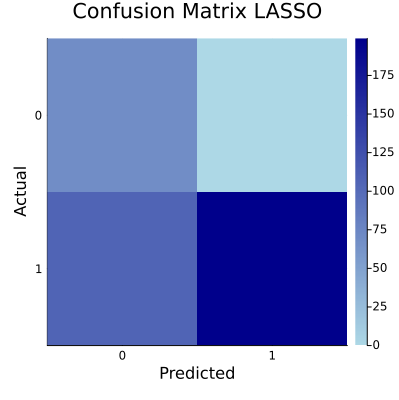

In [18]:
heatmap(MLJ.ConfusionMatrices.matrix(conf_matrix_lasso), xlabel="Predicted", ylabel="Actual", title="Confusion Matrix LASSO", c=:blues, xticks=(1:length(class_labels), class_labels), yticks=(1:length(class_labels), class_labels), colorbar=true, yflip=true, size=(400, 400))

In [19]:
roc_data_lasso = roc_curve(y_pred_lasso, y_test)
fpr_lasso = roc_data_lasso[1]
tpr_lasso = roc_data_lasso[2]

┌ Warning: Levels not explicitly ordered. Using the order [0, 1]. The "positive" level is 1. 
└ @ StatisticalMeasures /Users/daniel278/.julia/packages/StatisticalMeasures/UTtxb/src/roc.jl:28


376-element Vector{Float64}:
 0.0
 0.005025125628140704
 0.010050251256281407
 0.01507537688442211
 0.020100502512562814
 0.02512562814070352
 0.03015075376884422
 0.035175879396984924
 0.04020100502512563
 0.04522613065326633
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

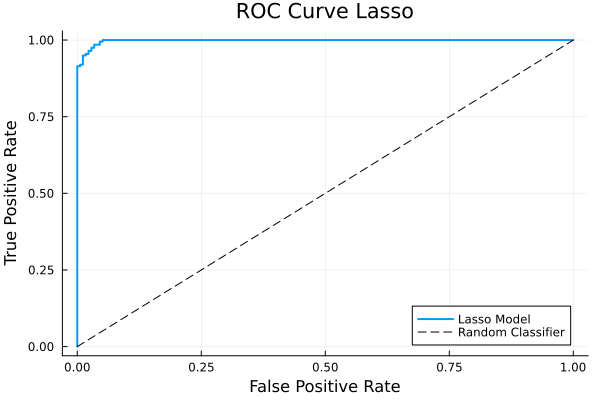

In [20]:
plot(fpr_lasso, tpr_lasso, xlabel="False Positive Rate", ylabel="True Positive Rate", title="ROC Curve Lasso", label="Lasso Model", linewidth=2)
plot!(x -> x, linestyle=:dash, color=:black, label="Random Classifier")

## Ridge

In [21]:
ridge_model = LogisticClassifier(penalty=:l2)

LogisticClassifier(
  lambda = 2.220446049250313e-16, 
  gamma = 0.0, 
  penalty = :l2, 
  fit_intercept = true, 
  penalize_intercept = false, 
  scale_penalty_with_samples = true, 
  solver = nothing)

In [22]:
ridge_machine = machine(ridge_model, X_train, y_train, scitype_check_level=0)
fit!(ridge_machine)

┌ Info: Training machine(LogisticClassifier(lambda = 2.220446049250313e-16, …), …).
└ @ MLJBase /Users/daniel278/.julia/packages/MLJBase/7nGJF/src/machines.jl:499
┌ Info: Solver: MLJLinearModels.LBFGS{Optim.Options{Float64, Nothing}, @NamedTuple{}}
│   optim_options: Optim.Options{Float64, Nothing}
│   lbfgs_options: @NamedTuple{} NamedTuple()
└ @ MLJLinearModels /Users/daniel278/.julia/packages/MLJLinearModels/yYgtO/src/mlj/interface.jl:72


trained Machine; caches model-specific representations of data
  model: LogisticClassifier(lambda = 2.220446049250313e-16, …)
  args: 
    1:	Source @088 ⏎ Table{Union{AbstractVector{Continuous}, AbstractVector{Count}}}
    2:	Source @870 ⏎ AbstractVector{Multiclass{2}}


In [23]:
y_pred_ridge = MLJ.predict(ridge_machine, X_test)
y_pred_ridge_class = mode.(y_pred_ridge)

375-element CategoricalArrays.CategoricalArray{Int64,1,UInt32}:
 0
 0
 0
 1
 0
 0
 1
 0
 1
 1
 ⋮
 1
 0
 0
 1
 0
 0
 0
 0
 1

In [24]:
conf_matrix_ridge = MLJ.confusion_matrix(y_pred_ridge_class, y_test)
conf_matrix_ridge

          ┌─────────────┐
          │Ground Truth │
┌─────────┼──────┬──────┤
│Predicted│  0   │  1   │
├─────────┼──────┼──────┤
│    0    │ 175  │  1   │
├─────────┼──────┼──────┤
│    1    │  1   │ 198  │
└─────────┴──────┴──────┘


┌ Warning: Levels not explicitly ordered. Using the order CategoricalArrays.CategoricalValue{Int64, UInt32}[0, 1]. The "positive" level is 1. 
└ @ StatisticalMeasures.ConfusionMatrices /Users/daniel278/.julia/packages/StatisticalMeasures/UTtxb/src/confusion_matrices.jl:339


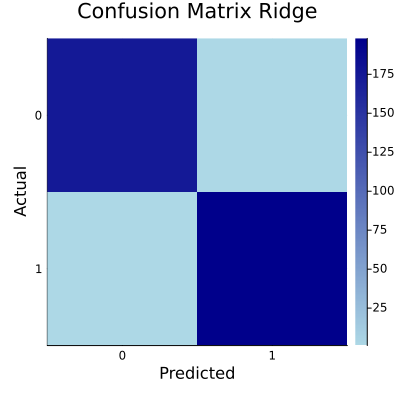

In [25]:
heatmap(MLJ.ConfusionMatrices.matrix(conf_matrix_ridge), xlabel="Predicted", ylabel="Actual", title="Confusion Matrix Ridge", c=:blues, xticks=(1:length(class_labels), class_labels), yticks=(1:length(class_labels), class_labels), colorbar=true, yflip=true, size=(400, 400))

In [26]:
roc_data_ridge = roc_curve(y_pred_ridge, y_test)
fpr_ridge = roc_data_ridge[1]
tpr_ridge = roc_data_ridge[2]

┌ Warning: Levels not explicitly ordered. Using the order [0, 1]. The "positive" level is 1. 
└ @ StatisticalMeasures /Users/daniel278/.julia/packages/StatisticalMeasures/UTtxb/src/roc.jl:28


19-element Vector{Float64}:
 0.0
 0.9396984924623115
 0.9447236180904522
 0.949748743718593
 0.9547738693467337
 0.9597989949748744
 0.964824120603015
 0.9698492462311558
 0.9748743718592965
 0.9798994974874372
 0.9849246231155779
 0.9899497487437185
 0.9949748743718593
 0.9949748743718593
 0.9949748743718593
 0.9949748743718593
 1.0
 1.0
 1.0

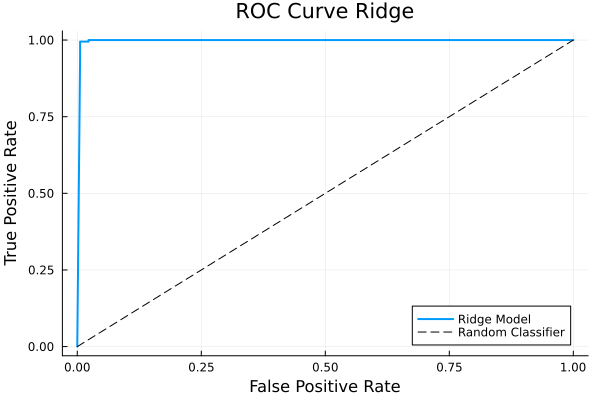

In [27]:
plot(fpr_ridge, tpr_ridge, xlabel="False Positive Rate", ylabel="True Positive Rate", title="ROC Curve Ridge", label="Ridge Model", linewidth=2)
plot!(x -> x, linestyle=:dash, color=:black, label="Random Classifier")

## Elastic Net

In [28]:
elasticnet_model = LogisticClassifier(penalty=:en)

LogisticClassifier(
  lambda = 2.220446049250313e-16, 
  gamma = 0.0, 
  penalty = :en, 
  fit_intercept = true, 
  penalize_intercept = false, 
  scale_penalty_with_samples = true, 
  solver = nothing)

In [29]:
elasticnet_machine = machine(elasticnet_model, X_train, y_train, scitype_check_level=0)
fit!(elasticnet_machine)

┌ Info: Training machine(LogisticClassifier(lambda = 2.220446049250313e-16, …), …).
└ @ MLJBase /Users/daniel278/.julia/packages/MLJBase/7nGJF/src/machines.jl:499
┌ Info: Solver: MLJLinearModels.ProxGrad
│   accel: Bool true
│   max_iter: Int64 1000
│   tol: Float64 0.0001
│   max_inner: Int64 100
│   beta: Float64 0.8
│   gram: Bool false
└ @ MLJLinearModels /Users/daniel278/.julia/packages/MLJLinearModels/yYgtO/src/mlj/interface.jl:72
┌ Warning: Proximal GD did not converge in 1000 iterations.
└ @ MLJLinearModels /Users/daniel278/.julia/packages/MLJLinearModels/yYgtO/src/fit/proxgrad.jl:73


trained Machine; caches model-specific representations of data
  model: LogisticClassifier(lambda = 2.220446049250313e-16, …)
  args: 
    1:	Source @637 ⏎ Table{Union{AbstractVector{Continuous}, AbstractVector{Count}}}
    2:	Source @565 ⏎ AbstractVector{Multiclass{2}}


In [30]:
y_pred_elasticnet = MLJ.predict(elasticnet_machine, X_test)
y_pred_elasticnet_class = mode.(y_pred_elasticnet)

375-element CategoricalArrays.CategoricalArray{Int64,1,UInt32}:
 1
 1
 1
 1
 0
 0
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 0
 0
 0
 0
 1

In [31]:
conf_matrix_elasticnet = MLJ.confusion_matrix(y_pred_elasticnet_class, y_test)
conf_matrix_elasticnet

          ┌─────────────┐
          │Ground Truth │
┌─────────┼──────┬──────┤
│Predicted│  0   │  1   │
├─────────┼──────┼──────┤
│    0    │  69  │  0   │
├─────────┼──────┼──────┤
│    1    │ 107  │ 199  │
└─────────┴──────┴──────┘


┌ Warning: Levels not explicitly ordered. Using the order CategoricalArrays.CategoricalValue{Int64, UInt32}[0, 1]. The "positive" level is 1. 
└ @ StatisticalMeasures.ConfusionMatrices /Users/daniel278/.julia/packages/StatisticalMeasures/UTtxb/src/confusion_matrices.jl:339


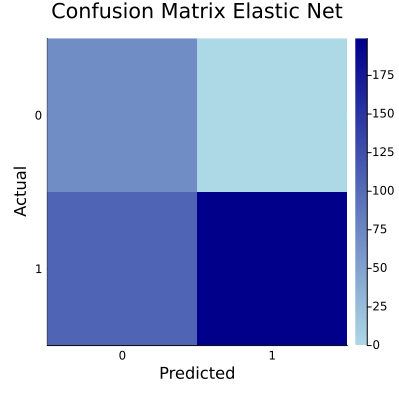

In [32]:
heatmap(MLJ.ConfusionMatrices.matrix(conf_matrix_elasticnet), xlabel="Predicted", ylabel="Actual", title="Confusion Matrix Elastic Net", c=:blues, xticks=(1:length(class_labels), class_labels), yticks=(1:length(class_labels), class_labels), colorbar=true, yflip=true, size=(400, 400))

In [33]:
roc_data_elasticnet = roc_curve(y_pred_elasticnet, y_test)
fpr_elasticnet = roc_data_elasticnet[1]
tpr_elasticnet = roc_data_elasticnet[2]

┌ Warning: Levels not explicitly ordered. Using the order [0, 1]. The "positive" level is 1. 
└ @ StatisticalMeasures /Users/daniel278/.julia/packages/StatisticalMeasures/UTtxb/src/roc.jl:28


376-element Vector{Float64}:
 0.0
 0.005025125628140704
 0.010050251256281407
 0.01507537688442211
 0.020100502512562814
 0.02512562814070352
 0.03015075376884422
 0.035175879396984924
 0.04020100502512563
 0.04522613065326633
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

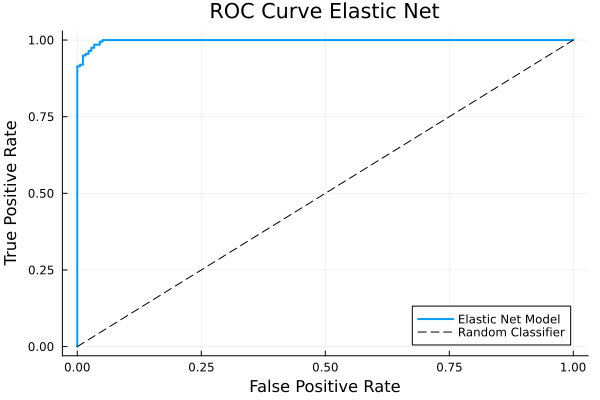

In [34]:
plot(fpr_elasticnet, tpr_elasticnet, xlabel="False Positive Rate", ylabel="True Positive Rate", title="ROC Curve Elastic Net", label="Elastic Net Model", linewidth=2)
plot!(x -> x, linestyle=:dash, color=:black, label="Random Classifier")

## Decision tree

In [35]:
DecisionTreeClassifier = @load DecisionTreeClassifier pkg=DecisionTree

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /Users/daniel278/.julia/packages/MLJModels/t6RKS/src/loading.jl:159


import MLJDecisionTreeInterface ✔


MLJDecisionTreeInterface.DecisionTreeClassifier

In [36]:
decisiontree_model = DecisionTreeClassifier()

DecisionTreeClassifier(
  max_depth = -1, 
  min_samples_leaf = 1, 
  min_samples_split = 2, 
  min_purity_increase = 0.0, 
  n_subfeatures = 0, 
  post_prune = false, 
  merge_purity_threshold = 1.0, 
  display_depth = 5, 
  feature_importance = :impurity, 
  rng = TaskLocalRNG())

In [37]:
decisiontree_machine = machine(decisiontree_model, X_train, y_train, scitype_check_level=0)
fit!(decisiontree_machine)

┌ Info: Training machine(DecisionTreeClassifier(max_depth = -1, …), …).
└ @ MLJBase /Users/daniel278/.julia/packages/MLJBase/7nGJF/src/machines.jl:499


trained Machine; caches model-specific representations of data
  model: DecisionTreeClassifier(max_depth = -1, …)
  args: 
    1:	Source @737 ⏎ Table{Union{AbstractVector{Continuous}, AbstractVector{Count}}}
    2:	Source @289 ⏎ AbstractVector{Multiclass{2}}


In [38]:
y_pred_decisiontree = MLJ.predict(decisiontree_machine, X_test)
y_pred_decisiontree_class = mode.(y_pred_decisiontree)

375-element CategoricalArrays.CategoricalArray{Int64,1,UInt32}:
 0
 0
 0
 1
 0
 0
 1
 0
 1
 1
 ⋮
 1
 0
 0
 1
 0
 0
 0
 0
 1

In [39]:
conf_matrix_decisiontree = MLJ.confusion_matrix(y_pred_decisiontree_class, y_test)
conf_matrix_decisiontree

          ┌─────────────┐
          │Ground Truth │
┌─────────┼──────┬──────┤
│Predicted│  0   │  1   │
├─────────┼──────┼──────┤
│    0    │ 176  │  0   │
├─────────┼──────┼──────┤
│    1    │  0   │ 199  │
└─────────┴──────┴──────┘


┌ Warning: Levels not explicitly ordered. Using the order CategoricalArrays.CategoricalValue{Int64, UInt32}[0, 1]. The "positive" level is 1. 
└ @ StatisticalMeasures.ConfusionMatrices /Users/daniel278/.julia/packages/StatisticalMeasures/UTtxb/src/confusion_matrices.jl:339


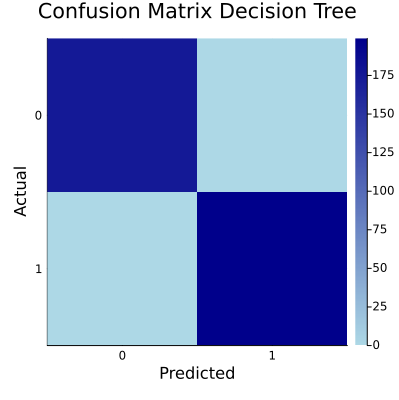

In [40]:
heatmap(MLJ.ConfusionMatrices.matrix(conf_matrix_decisiontree), xlabel="Predicted", ylabel="Actual", title="Confusion Matrix Decision Tree", c=:blues, xticks=(1:length(class_labels), class_labels), yticks=(1:length(class_labels), class_labels), colorbar=true, yflip=true, size=(400, 400))

In [41]:
roc_data_decisiontree = roc_curve(y_pred_decisiontree, y_test)
fpr_decisiontree = roc_data_decisiontree[1]
tpr_decisiontree = roc_data_decisiontree[2]

┌ Warning: Levels not explicitly ordered. Using the order [0, 1]. The "positive" level is 1. 
└ @ StatisticalMeasures /Users/daniel278/.julia/packages/StatisticalMeasures/UTtxb/src/roc.jl:28


3-element Vector{Float64}:
 0.0
 1.0
 1.0

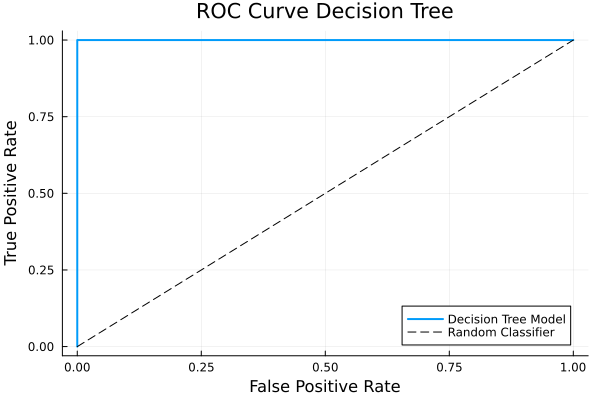

In [42]:
plot(fpr_decisiontree, tpr_decisiontree, xlabel="False Positive Rate", ylabel="True Positive Rate", title="ROC Curve Decision Tree", label="Decision Tree Model", linewidth=2)
plot!(x -> x, linestyle=:dash, color=:black, label="Random Classifier")

## Random Forest

In [43]:
RandomForestClassifier = @load RandomForestClassifier pkg=DecisionTree

import MLJDecisionTreeInterface ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /Users/daniel278/.julia/packages/MLJModels/t6RKS/src/loading.jl:159


MLJDecisionTreeInterface.RandomForestClassifier

In [44]:
randomforest_model = RandomForestClassifier()

RandomForestClassifier(
  max_depth = -1, 
  min_samples_leaf = 1, 
  min_samples_split = 2, 
  min_purity_increase = 0.0, 
  n_subfeatures = -1, 
  n_trees = 100, 
  sampling_fraction = 0.7, 
  feature_importance = :impurity, 
  rng = TaskLocalRNG())

In [45]:
randomforest_machine = machine(randomforest_model, X_train, y_train, scitype_check_level=0)
fit!(randomforest_machine)

┌ Info: Training machine(RandomForestClassifier(max_depth = -1, …), …).
└ @ MLJBase /Users/daniel278/.julia/packages/MLJBase/7nGJF/src/machines.jl:499


trained Machine; caches model-specific representations of data
  model: RandomForestClassifier(max_depth = -1, …)
  args: 
    1:	Source @242 ⏎ Table{Union{AbstractVector{Continuous}, AbstractVector{Count}}}
    2:	Source @531 ⏎ AbstractVector{Multiclass{2}}


In [46]:
y_pred_randomforest = MLJ.predict(randomforest_machine, X_test)
y_pred_randomforest_class = mode.(y_pred_randomforest)

375-element CategoricalArrays.CategoricalArray{Int64,1,UInt32}:
 0
 0
 0
 1
 0
 0
 1
 0
 1
 1
 ⋮
 1
 0
 0
 1
 0
 0
 0
 0
 1

In [47]:
conf_matrix_randomforest = MLJ.confusion_matrix(y_pred_randomforest_class, y_test)
conf_matrix_randomforest

          ┌─────────────┐
          │Ground Truth │
┌─────────┼──────┬──────┤
│Predicted│  0   │  1   │
├─────────┼──────┼──────┤
│    0    │ 176  │  0   │
├─────────┼──────┼──────┤
│    1    │  0   │ 199  │
└─────────┴──────┴──────┘


┌ Warning: Levels not explicitly ordered. Using the order CategoricalArrays.CategoricalValue{Int64, UInt32}[0, 1]. The "positive" level is 1. 
└ @ StatisticalMeasures.ConfusionMatrices /Users/daniel278/.julia/packages/StatisticalMeasures/UTtxb/src/confusion_matrices.jl:339


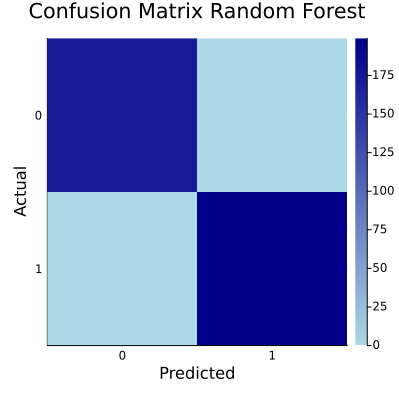

In [48]:
heatmap(MLJ.ConfusionMatrices.matrix(conf_matrix_randomforest), xlabel="Predicted", ylabel="Actual", title="Confusion Matrix Random Forest", c=:blues, xticks=(1:length(class_labels), class_labels), yticks=(1:length(class_labels), class_labels), colorbar=true, yflip=true, size=(400, 400))

In [49]:
roc_data_randomforest = roc_curve(y_pred_randomforest, y_test)
fpr_randomforest = roc_data_randomforest[1]
tpr_randomforest = roc_data_randomforest[2]

┌ Warning: Levels not explicitly ordered. Using the order [0, 1]. The "positive" level is 1. 
└ @ StatisticalMeasures /Users/daniel278/.julia/packages/StatisticalMeasures/UTtxb/src/roc.jl:28


24-element Vector{Float64}:
 0.0
 0.21105527638190955
 0.49246231155778897
 0.678391959798995
 0.7939698492462312
 0.8793969849246231
 0.9246231155778895
 0.9396984924623115
 0.9447236180904522
 0.9698492462311558
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

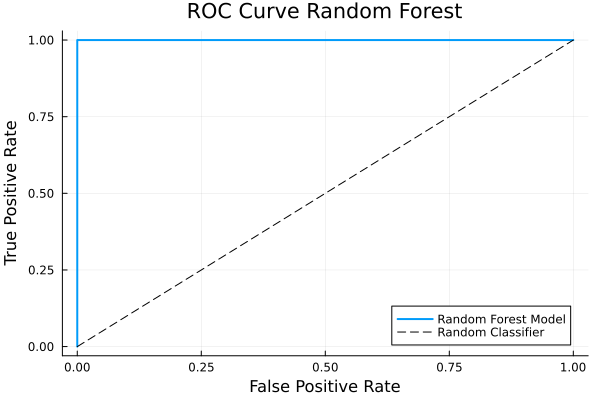

In [50]:
plot(fpr_randomforest, tpr_randomforest, xlabel="False Positive Rate", ylabel="True Positive Rate", title="ROC Curve Random Forest", label="Random Forest Model", linewidth=2)
plot!(x -> x, linestyle=:dash, color=:black, label="Random Classifier")

## Neirest Neighbors

In [51]:
KNNClassifier = @load KNNClassifier pkg=NearestNeighborModels

import NearestNeighborModels ✔

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /Users/daniel278/.julia/packages/MLJModels/t6RKS/src/loading.jl:159


NearestNeighborModels.KNNClassifier

In [52]:
KNN_model = KNNClassifier()

KNNClassifier(
  K = 5, 
  algorithm = :kdtree, 
  metric = Distances.Euclidean(0.0), 
  leafsize = 10, 
  reorder = true, 
  weights = NearestNeighborModels.Uniform())

In [53]:
KNN_machine = machine(KNN_model, X_train, y_train, scitype_check_level=0)
fit!(KNN_machine)

┌ Info: Training machine(KNNClassifier(K = 5, …), …).
└ @ MLJBase /Users/daniel278/.julia/packages/MLJBase/7nGJF/src/machines.jl:499


trained Machine; caches model-specific representations of data
  model: KNNClassifier(K = 5, …)
  args: 
    1:	Source @144 ⏎ Table{Union{AbstractVector{Continuous}, AbstractVector{Count}}}
    2:	Source @577 ⏎ AbstractVector{Multiclass{2}}


In [54]:
y_pred_KNN = MLJ.predict(KNN_machine, X_test)
y_pred_KNN_class = mode.(y_pred_KNN)

375-element CategoricalArrays.CategoricalArray{Int64,1,UInt32}:
 1
 0
 1
 1
 0
 0
 1
 0
 1
 1
 ⋮
 1
 0
 0
 1
 0
 0
 0
 0
 1

In [55]:
conf_matrix_KNN = MLJ.confusion_matrix(y_pred_KNN_class, y_test)
conf_matrix_KNN

          ┌─────────────┐
          │Ground Truth │
┌─────────┼──────┬──────┤
│Predicted│  0   │  1   │
├─────────┼──────┼──────┤
│    0    │ 149  │  23  │
├─────────┼──────┼──────┤
│    1    │  27  │ 176  │
└─────────┴──────┴──────┘


┌ Warning: Levels not explicitly ordered. Using the order CategoricalArrays.CategoricalValue{Int64, UInt32}[0, 1]. The "positive" level is 1. 
└ @ StatisticalMeasures.ConfusionMatrices /Users/daniel278/.julia/packages/StatisticalMeasures/UTtxb/src/confusion_matrices.jl:339


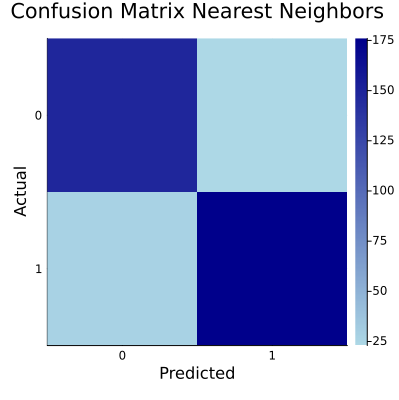

In [56]:
heatmap(MLJ.ConfusionMatrices.matrix(conf_matrix_KNN), xlabel="Predicted", ylabel="Actual", title="Confusion Matrix Nearest Neighbors", c=:blues, xticks=(1:length(class_labels), class_labels), yticks=(1:length(class_labels), class_labels), colorbar=true, yflip=true, size=(400, 400))

In [57]:
roc_data_KNN = roc_curve(y_pred_KNN, y_test)
fpr_KNN = roc_data_KNN[1]
tpr_KNN = roc_data_KNN[2]

┌ Warning: Levels not explicitly ordered. Using the order [0, 1]. The "positive" level is 1. 
└ @ StatisticalMeasures /Users/daniel278/.julia/packages/StatisticalMeasures/UTtxb/src/roc.jl:28


7-element Vector{Float64}:
 0.0
 0.45226130653266333
 0.7085427135678392
 0.8844221105527639
 0.9698492462311558
 1.0
 1.0

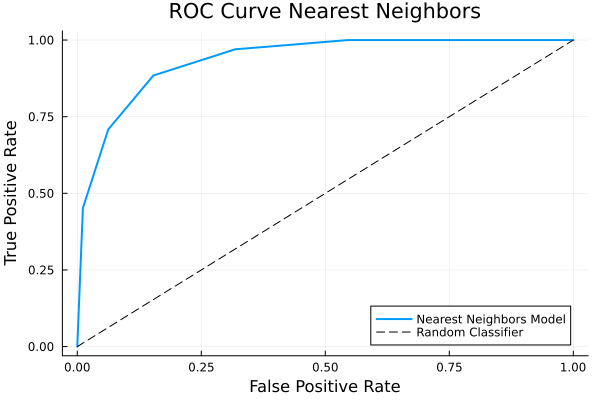

In [58]:
plot(fpr_KNN, tpr_KNN, xlabel="False Positive Rate", ylabel="True Positive Rate", title="ROC Curve Nearest Neighbors", label="Nearest Neighbors Model", linewidth=2)
plot!(x -> x, linestyle=:dash, color=:black, label="Random Classifier")

## Support Vector Machine

In [59]:
SVMClassifier = @load ProbabilisticSVC pkg=LIBSVM

import MLJLIBSVMInterface ✔

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /Users/daniel278/.julia/packages/MLJModels/t6RKS/src/loading.jl:159


MLJLIBSVMInterface.ProbabilisticSVC

In [60]:
SVM_model = SVMClassifier()

ProbabilisticSVC(
  kernel = LIBSVM.Kernel.RadialBasis, 
  gamma = 0.0, 
  cost = 1.0, 
  cachesize = 200.0, 
  degree = 3, 
  coef0 = 0.0, 
  tolerance = 0.001, 
  shrinking = true)

In [61]:
SVM_machine = machine(SVM_model, X_train, y_train, scitype_check_level=0)
fit!(SVM_machine)

┌ Info: Training machine(ProbabilisticSVC(kernel = RadialBasis, …), …).
└ @ MLJBase /Users/daniel278/.julia/packages/MLJBase/7nGJF/src/machines.jl:499


trained Machine; caches model-specific representations of data
  model: ProbabilisticSVC(kernel = RadialBasis, …)
  args: 
    1:	Source @774 ⏎ Table{Union{AbstractVector{Continuous}, AbstractVector{Count}}}
    2:	Source @462 ⏎ AbstractVector{Multiclass{2}}


In [62]:
y_pred_SVM = MLJ.predict(SVM_machine, X_test)
y_pred_SVM_class = mode.(y_pred_SVM)

375-element CategoricalArrays.CategoricalArray{Int64,1,UInt32}:
 0
 0
 0
 1
 0
 0
 1
 0
 1
 1
 ⋮
 1
 0
 0
 1
 0
 0
 0
 0
 1

In [63]:
conf_matrix_SVM = MLJ.confusion_matrix(y_pred_SVM_class, y_test)
conf_matrix_SVM

          ┌─────────────┐
          │Ground Truth │
┌─────────┼──────┬──────┤
│Predicted│  0   │  1   │
├─────────┼──────┼──────┤
│    0    │ 176  │  65  │
├─────────┼──────┼──────┤
│    1    │  0   │ 134  │
└─────────┴──────┴──────┘


┌ Warning: Levels not explicitly ordered. Using the order CategoricalArrays.CategoricalValue{Int64, UInt32}[0, 1]. The "positive" level is 1. 
└ @ StatisticalMeasures.ConfusionMatrices /Users/daniel278/.julia/packages/StatisticalMeasures/UTtxb/src/confusion_matrices.jl:339


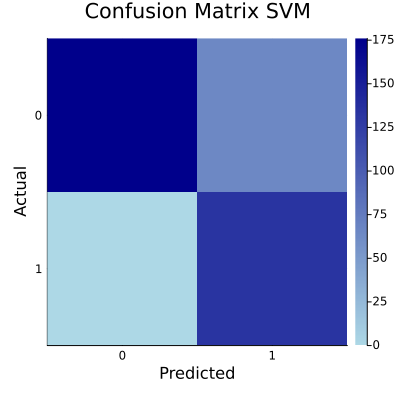

In [65]:
heatmap(MLJ.ConfusionMatrices.matrix(conf_matrix_SVM), xlabel="Predicted", ylabel="Actual", title="Confusion Matrix SVM", c=:blues, xticks=(1:length(class_labels), class_labels), yticks=(1:length(class_labels), class_labels), colorbar=true, yflip=true, size=(400, 400))

In [66]:
roc_data_SVM = roc_curve(y_pred_SVM, y_test)
fpr_SVM = roc_data_SVM[1]
tpr_SVM = roc_data_SVM[2]

┌ Warning: Levels not explicitly ordered. Using the order [0, 1]. The "positive" level is 1. 
└ @ StatisticalMeasures /Users/daniel278/.julia/packages/StatisticalMeasures/UTtxb/src/roc.jl:28


376-element Vector{Float64}:
 0.0
 0.005025125628140704
 0.010050251256281407
 0.01507537688442211
 0.020100502512562814
 0.02512562814070352
 0.03015075376884422
 0.035175879396984924
 0.04020100502512563
 0.04522613065326633
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

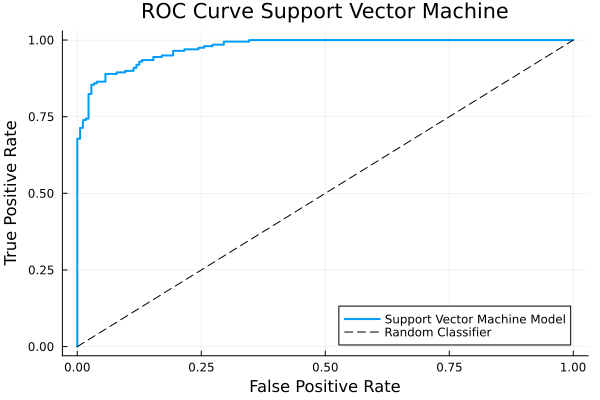

In [67]:
plot(fpr_SVM, tpr_SVM, xlabel="False Positive Rate", ylabel="True Positive Rate", title="ROC Curve Support Vector Machine", label="Support Vector Machine Model", linewidth=2)
plot!(x -> x, linestyle=:dash, color=:black, label="Random Classifier")